In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
heart = pd.read_csv('data/heart.csv')
df = heart

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()


0

In [7]:
# Transform categorical data to numerical data
# use one-hot encoding

cat_var_names = df.select_dtypes(include=['object']).columns

# display number of unique values for each categorical variable
for var in cat_var_names:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Sex  contains  2  labels
ChestPainType  contains  4  labels
RestingECG  contains  3  labels
ExerciseAngina  contains  2  labels
ST_Slope  contains  3  labels


In [8]:
# do one-hot encoding on all categorical variables
df = pd.get_dummies(df, drop_first=True)

In [9]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


# Data Visualization

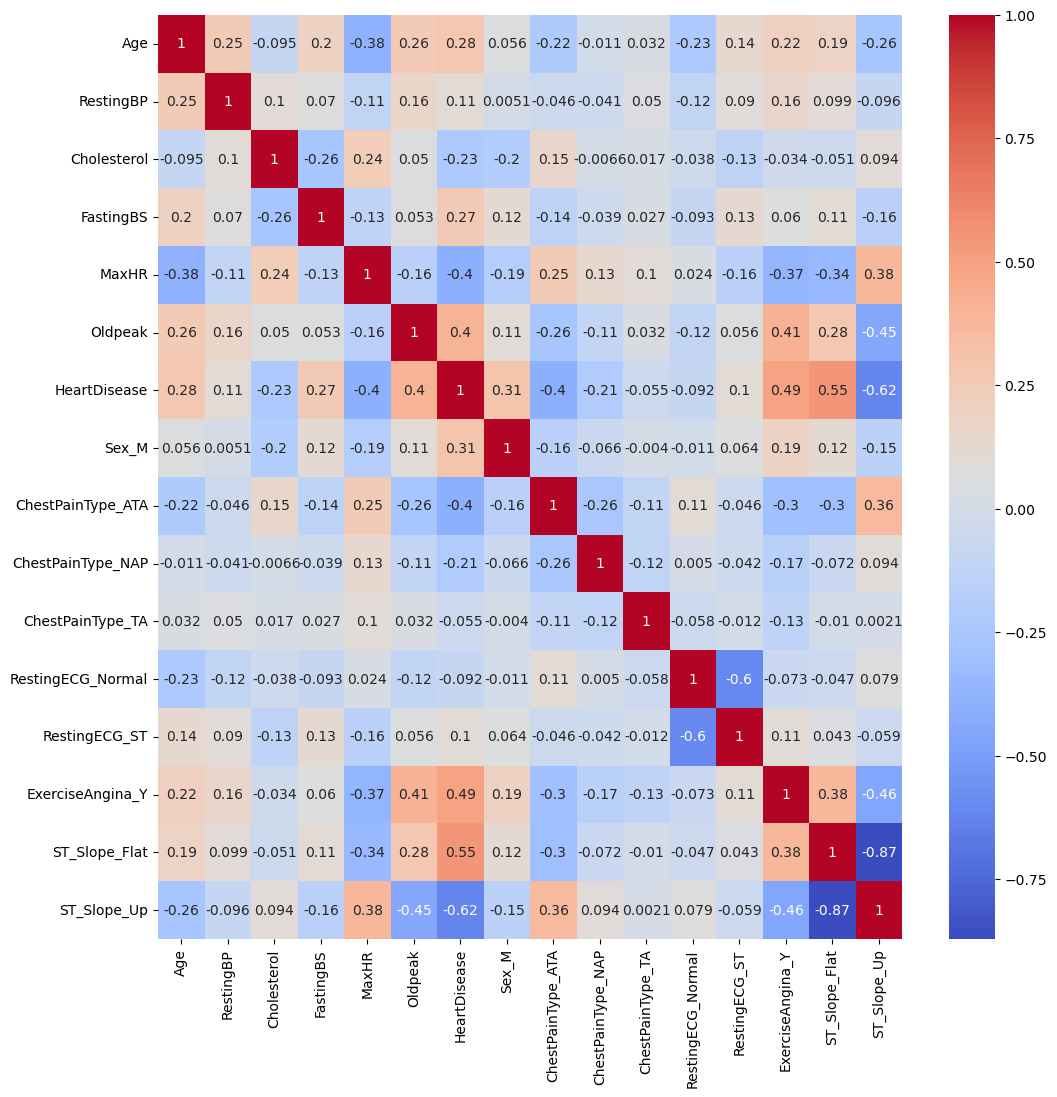

In [10]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

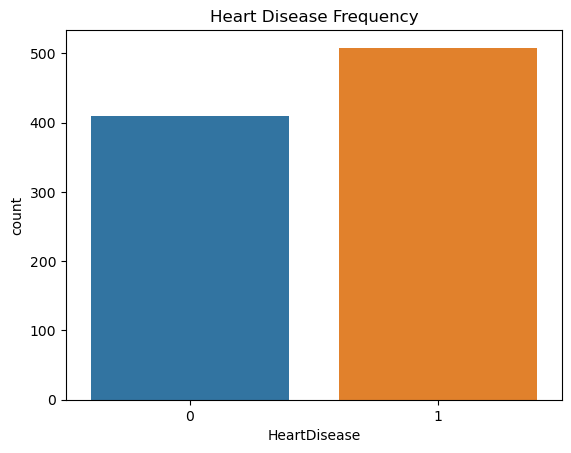

In [11]:
# show number of people with heart disease and without heart disease
sns.countplot(x='HeartDisease', data=df).set_title('Heart Disease Frequency')
plt.show()

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.188453,0.221133,0.050109,0.601307,0.193900,0.404139,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.391287,0.415236,0.218289,0.489896,0.395567,0.490992,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


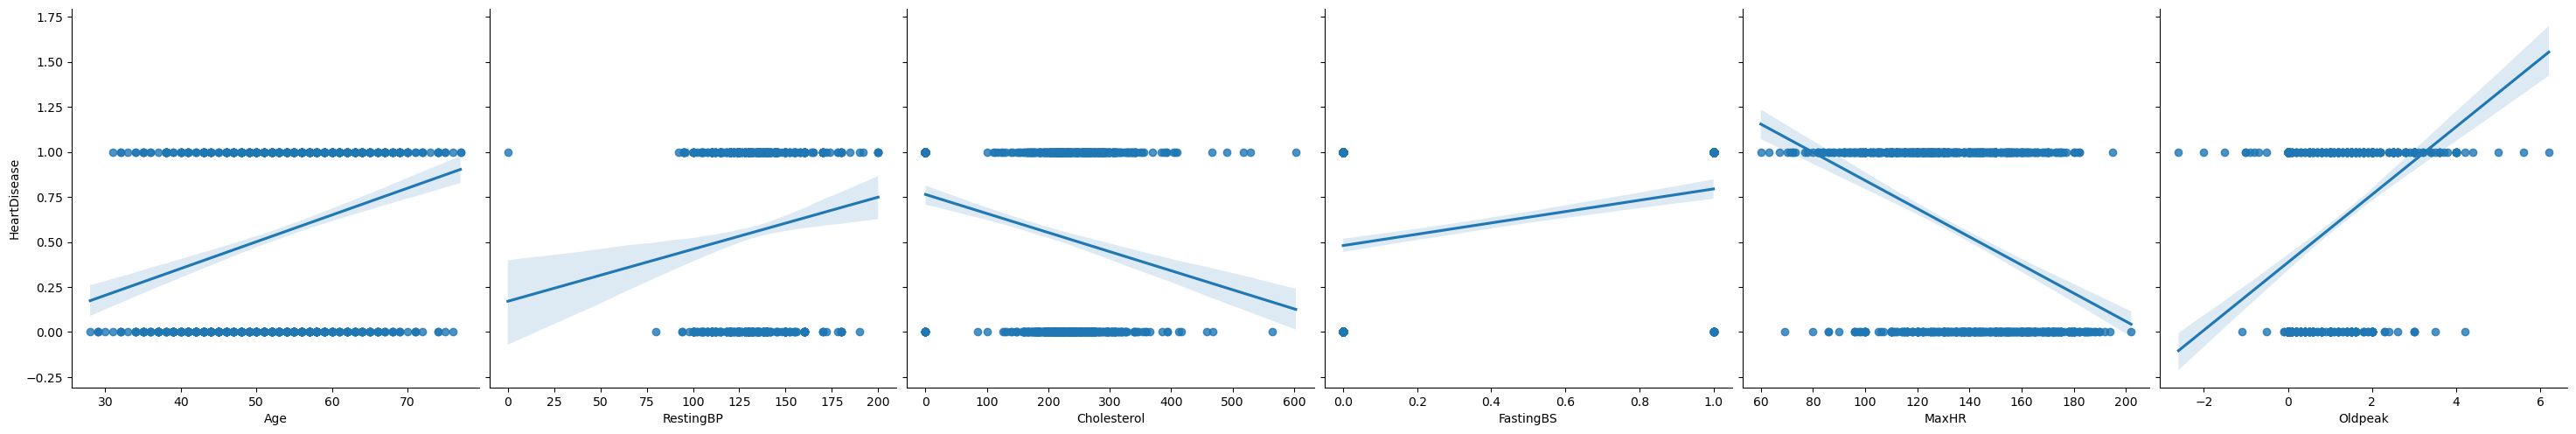

In [13]:
continuous_features = ['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak']
sns.pairplot(heart, x_vars=continuous_features, y_vars='HeartDisease', kind = 'reg', height = 5)

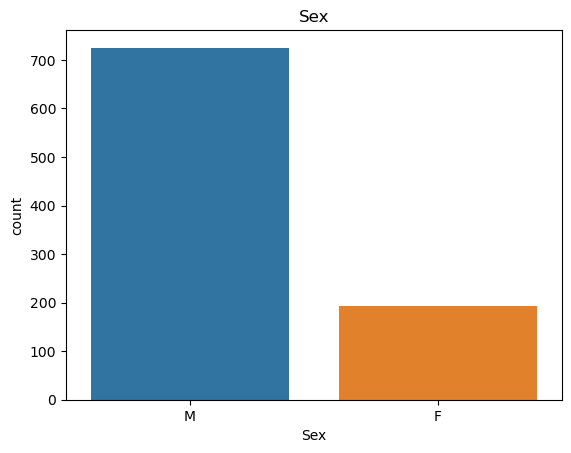

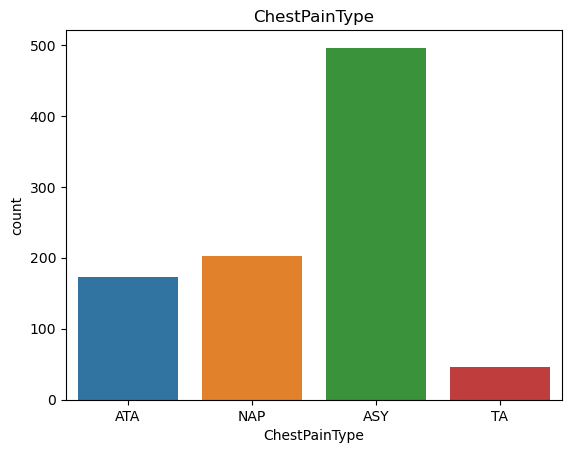

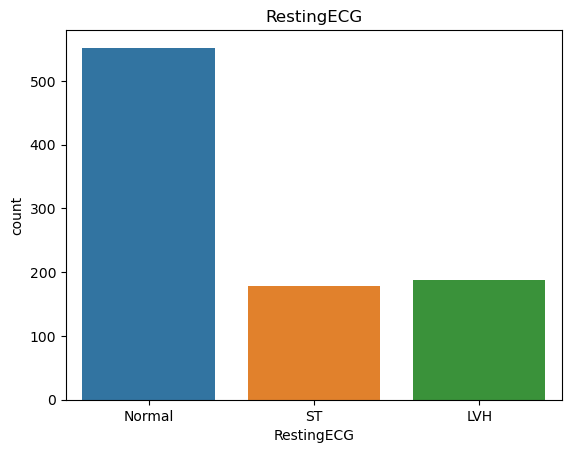

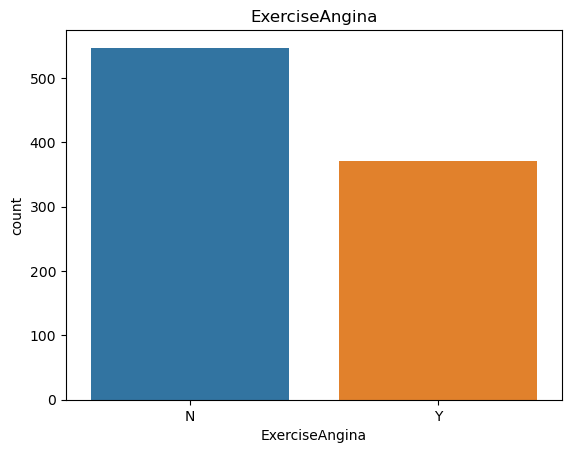

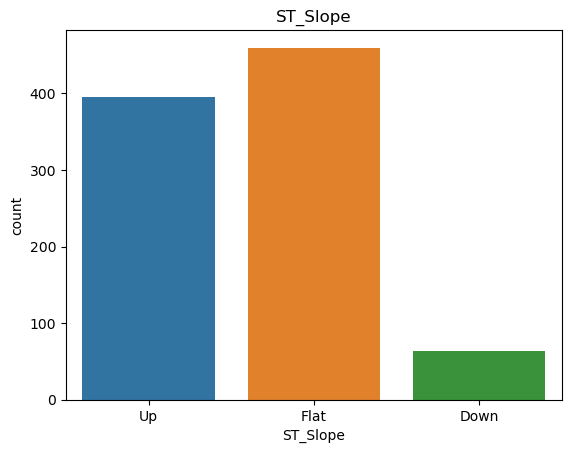

In [14]:
categorical_features = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for feature in categorical_features:
    #sns.countplot(x=', y='HeartDisease', data=heart, kind='bar', height=5)
    sns.countplot(x=feature, data=heart[[feature]]).set(title=feature)
    plt.show()

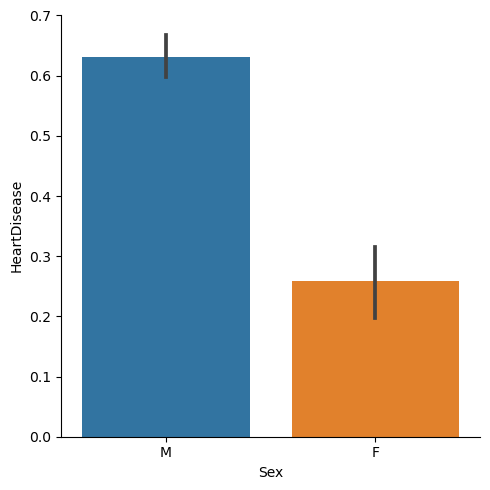

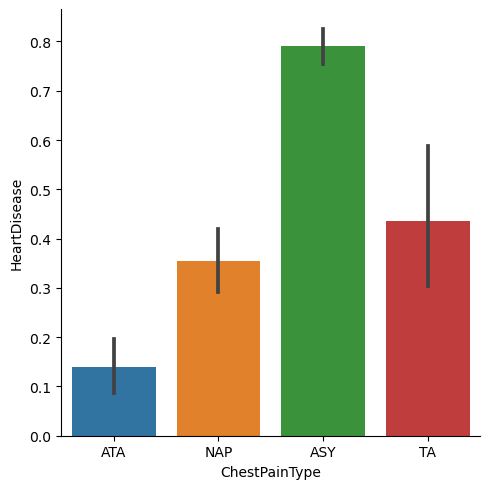

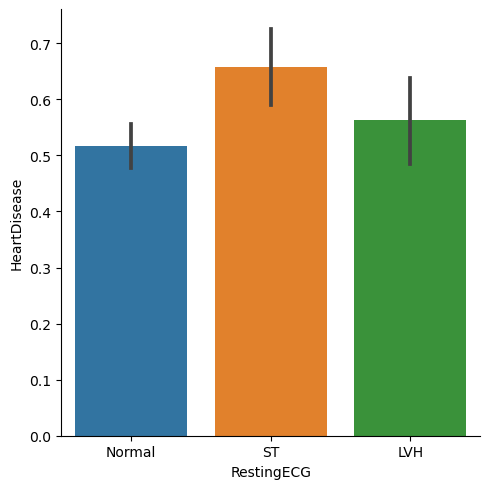

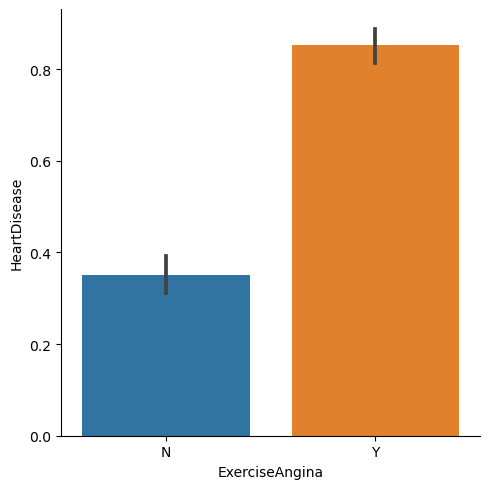

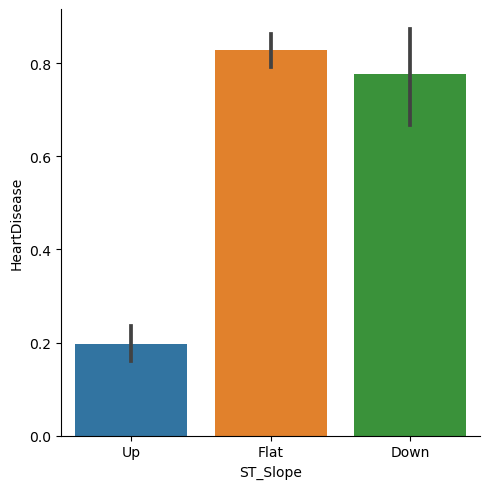

In [15]:
for feature in categorical_features:
    sns.catplot(x=feature, y='HeartDisease', data=heart, kind='bar', height=5)
    plt.show()


In [16]:
# TODO:
# Linear Regression
# Linear SVM
# Non-linear SVM
# Random Forest
# Boosting

## Outliers detection through PCA

In [17]:
#!pip install pca
from pca import pca

data = df
data = data.set_index('HeartDisease')

In [18]:
outliers_detection = pca(normalize=True, detect_outliers=['ht2','spe'],n_std=3)

outliers = outliers_detection.fit_transform(data)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [15] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [13] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [19]:
# data.loc[outliers['outliers']['y_bool'],:]
# df.loc[outliers['outliers']['y_bool'],:]
# np.where(outliers['outliers']['y_bool']==True)
# print(outliers['outliers'])

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2000x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'Outliers marked using SPE/dmodX and Hotellings T2 methods'}, xlabel='PC1 (22.5% expl.var)', ylabel='PC2 (11.0% expl.var)'>)

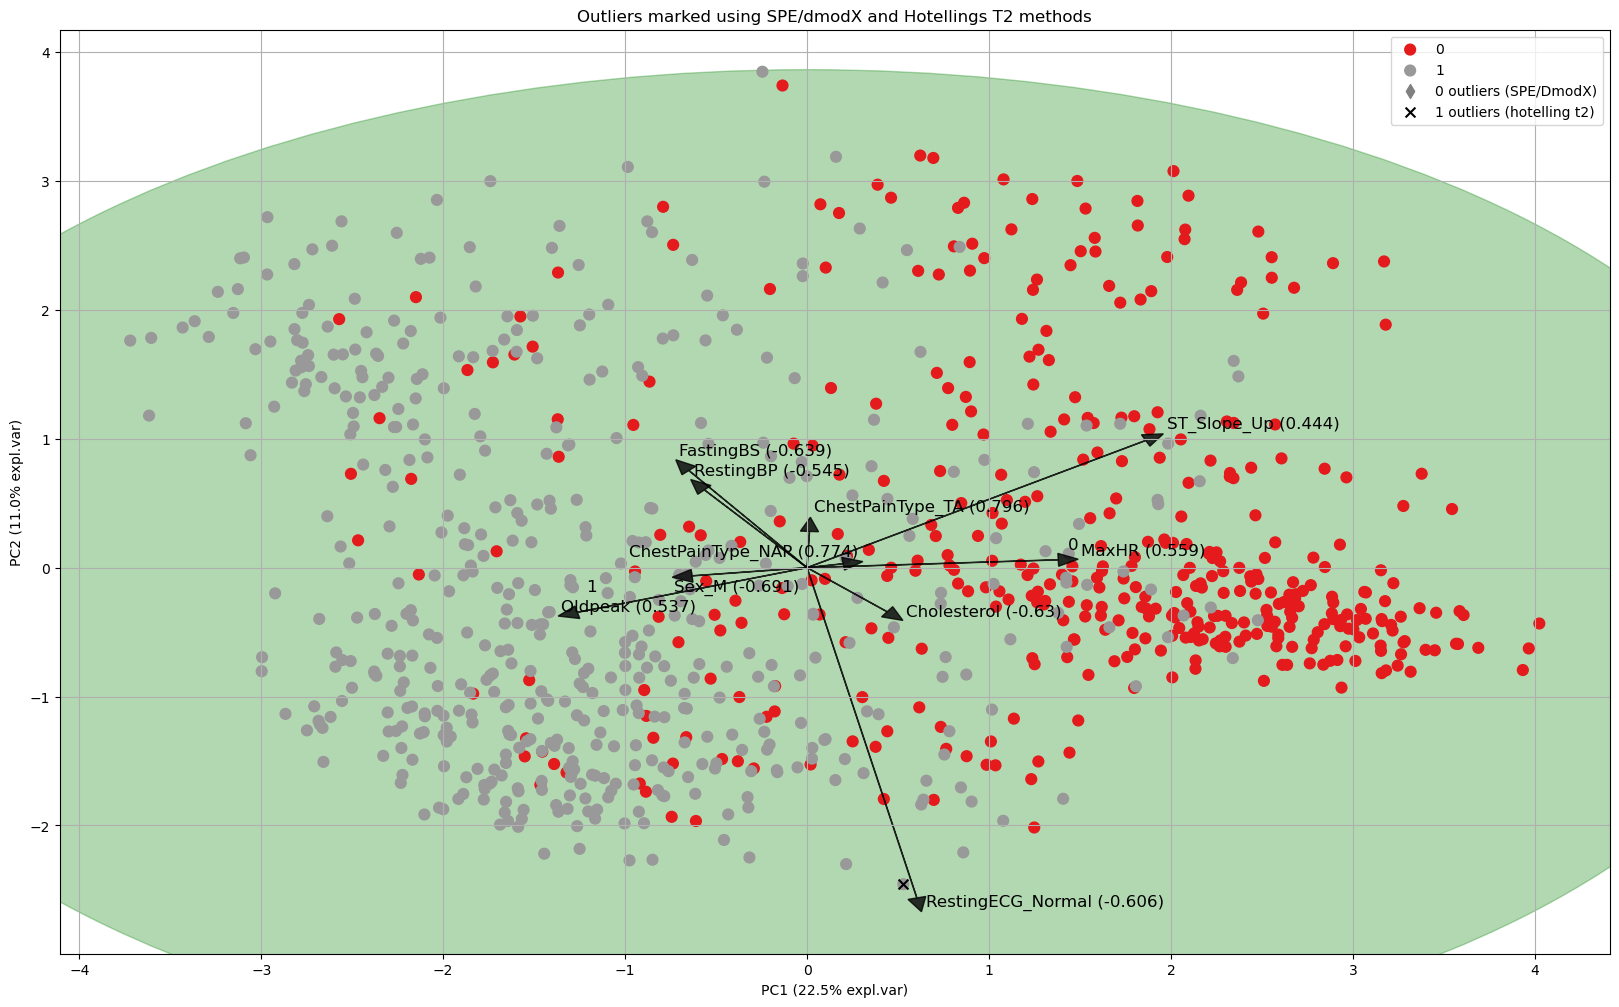

In [20]:
outliers_detection.biplot(SPE=True,hotellingt2=True,title='Outliers marked using SPE/dmodX and Hotellings T2 methods', label = True,
                          jitter = 0.1, n_feat = 10, legend = True, y = data.index, figsize=(20,12),color_arrow = 'k')
                        #   cmap = 'bwr_r')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 2000x1200 with 2 Axes>,
 <Axes3D:title={'center':'Outliers marked using SPE/dmodX and Hotellings T2 methods'}, xlabel='PC1 (22.5% expl.var)', ylabel='PC2 (11.0% expl.var)'>)

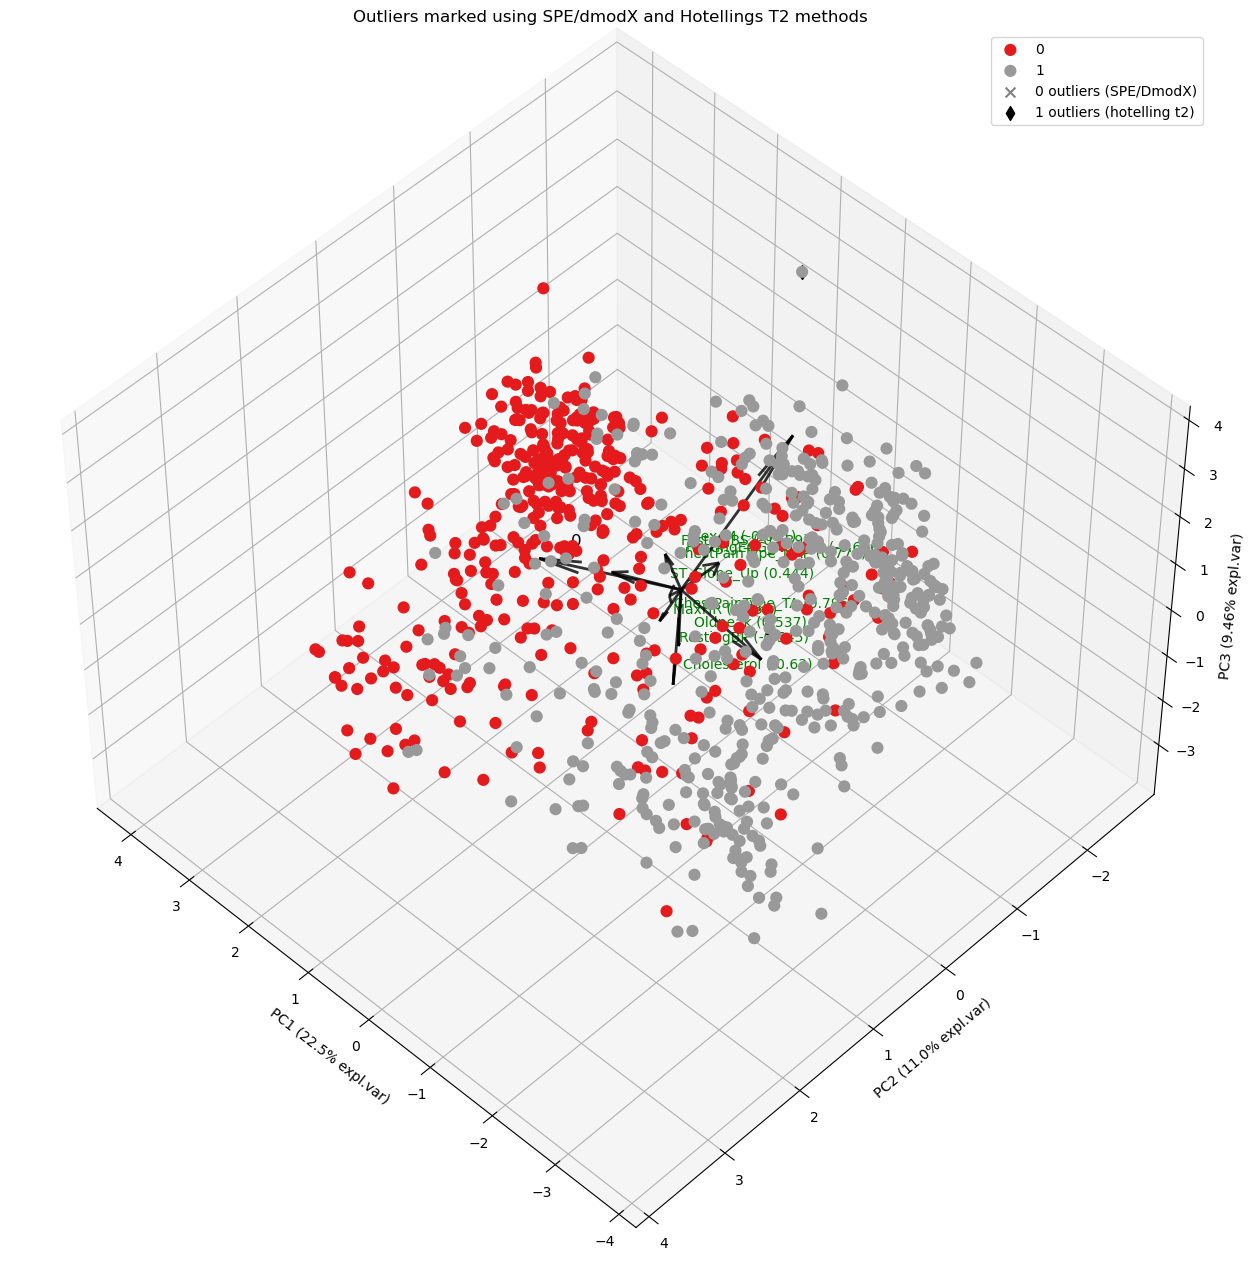

In [21]:
outliers_detection.biplot3d(SPE=True,hotellingt2=True,title='Outliers marked using SPE/dmodX and Hotellings T2 methods', label = True,
                          jitter = 0.1, n_feat = 10, legend = True, y = data.index, figsize=(20,12),color_arrow = 'k')

## Create Test and Train Data

In [22]:
from sklearn.model_selection import train_test_split

df = df.loc[df.index!=449,:]
X = df.loc[:, df.columns != 'HeartDisease']
y = df[['HeartDisease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [23]:
X_train.shape, X_test.shape

((733, 15), (184, 15))

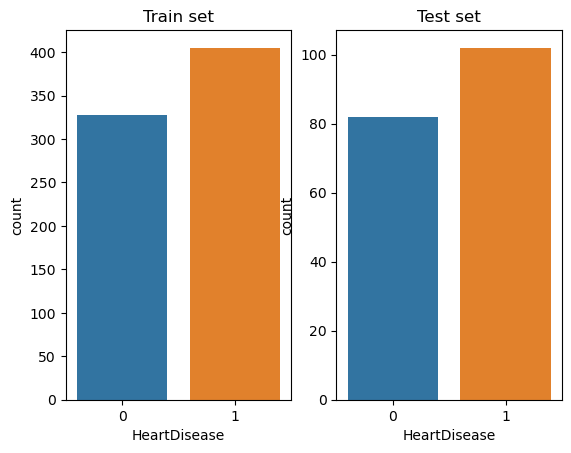

In [24]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='HeartDisease', data=y_train, ax = axes[0]).set(title='Train set')
sns.countplot(x='HeartDisease', data=y_test, ax = axes[1]).set(title='Test set')
plt.show()

## Transformation and model training

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, f1_score, confusion_matrix

In [26]:
# Set up the pipeline

scaler = MinMaxScaler()
pca = decomposition.PCA()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(733, 15)
(733, 1)
(184, 15)
(184, 1)


LOGISTIC REGRESSION

In [47]:
# Logistic Regression Pipeline
from sklearn.linear_model import LogisticRegression

logistic_Reg = LogisticRegression(max_iter=10000,tol=0.0001)


pipe = Pipeline(steps=[('scaler',scaler), ('pca', pca), ('logistic_Reg', logistic_Reg)])

In [48]:
# pca = decomposition.PCA(n_components=3)
# pca.fit(X_train)
# X = pca.transform(X_train)


In [49]:
# Logistic Regression Grid Search

#scaler = [StandardScaler(), MinMaxScaler()]
# n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_components = [3, 4, 5, 6, 7, 8]
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

# SCORINGS = "f1_weighted"
SCORINGS = "f1"

parameters = dict(pca__n_components=n_components,
                  logistic_Reg__C=C,
                  logistic_Reg__penalty=penalty)


In [50]:
# Logistic Regression hyperparameter tuning by CV

clf_LogReg = GridSearchCV(pipe, parameters, n_jobs=2, scoring=SCORINGS, verbose=1, cv=10)

clf_LogReg.fit(X_train, y_train)


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=2,
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03,...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [3, 4, 5, 6, 7, 8]},


In [51]:
# cv_results_df = pd.DataFrame(clf_LogReg.cv_results_)

# with pd.option_context("display.float_format", "{:.2g}".format):
#     display(cv_results_df)

In [52]:
print('Best Penalty:', clf_LogReg.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_LogReg.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_LogReg.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_LogReg.best_estimator_.get_params()['logistic_Reg'])
print("accuracy :",clf_LogReg.best_score_)


Best Penalty: l2
Best C: 2.559547922699533
Best Number Of Components: 5

LogisticRegression(C=2.559547922699533, max_iter=10000)
accuracy : 0.8872657875722322


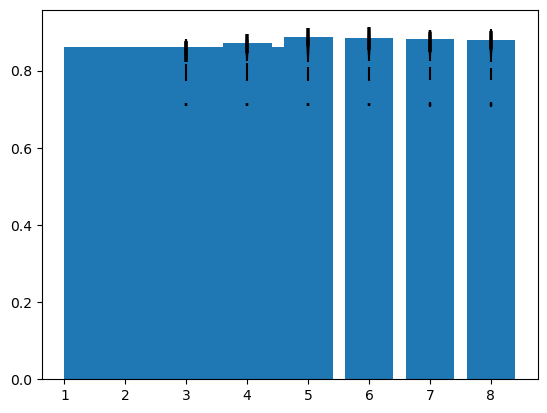

In [56]:
param = clf_LogReg.cv_results_["param_pca__n_components"]

plt.bar(
    clf_LogReg.cv_results_["param_pca__n_components"],
    clf_LogReg.cv_results_["mean_test_score"],
    yerr=clf_LogReg.cv_results_["std_test_score"],
    width=0.8
    * np.diff(clf_LogReg.cv_results_["param_pca__n_components"].data, prepend=0),
)
plt.show()

In [53]:
# Logistic Regression with optimized hyperparameters

# Fit
clf_LogReg.best_estimator_.fit(X_train, y_train)

# Predict
y_pred = clf_LogReg.best_estimator_.predict(X_test)

# Evaluate

print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

Accuracy score: 0.85
F1 Score: 0.86


/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# Logistic Regression

lr = LogisticRegression(max_iter=10000,tol=0.1)

lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate

print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

/Users/halvardbariller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.85
F1 Score: 0.86


In [142]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

LINEAR SVM

In [ ]:
# Linear SVM
from sklearn.svm import LinearSVC

lsvm = LinearSVC(max_iter=10000)
lsvm.fit(X_train, y_train)

# Predict
y_pred = lsvm.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

In [ ]:
# Non-linear SVM
from sklearn.svm import SVC

nsvm = SVC(kernel='rbf', gamma='auto')
nsvm.fit(X_train, y_train)

# Predict
y_pred = nsvm.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

In [ ]:
# Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)

# Predict
y_pred = gb.predict(X_test)

# Evaluate
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

In [ ]:
print('test')

To do (H):
- SmoteNC for different approach (without One-Hot !!!)

## LAZY PREDICT

In [52]:
# !pip install lazypredict
from lazypredict.Supervised import LazyClassifier

In [53]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 90%|████████▉ | 26/29 [00:01<00:00, 16.58it/s]

: 

: 